# Logistic Regression with penguins

Short recap:
What types of machine learning algorithms do you know? 
- supervised learning
- unsupervised learning

What types of supervised learning do you know?
- classification
- regression

Goal:
- understand the concept of logistic regression
- apply this method with the python built-in possibilites to penguins
- side effects: repetition of ML workflow and several pointers to upcoming encounters

***

### The sigmoid function  
We will meet this function more often in the following weeks:

$$p(f) = \frac{1}{1+e^{⁻f}}$$  

How does it look like graphically?

Text(0.5, 1.0, 'The sigmoid function')

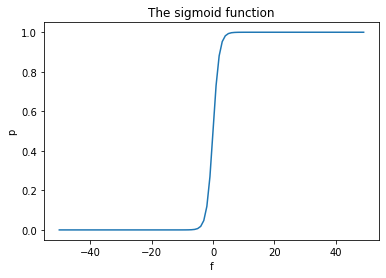

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# create the sigmoid function
def my_function(f):
    '''Calculates p for given f'''
    # p = 1+np.exp(-f)
    p = 1/(1+np.exp(-f))
    return p


f = np.arange(-50, 50, 1)
p = my_function(f)

plt.plot(f,p)
plt.xlabel('f')
plt.ylabel('p')
plt.title('The sigmoid function')

What are the characteristics of this sigmoid function?  

How can we modify it?  

The only variable parameter in the sigmoid function is the _f_.
_f_ is called the *logit*. Here we let f be a linear function:

$$f(x) = b + w*x$$
_f_  is the response. (Here it is the input to the sigmoid function.)  
_x_  is the independent variable.   
_b_  is called intersept (where _f(x)_ intersects the y-axis).  
_w_  is called weight.  

=> To alter the simgoid function we can change _b_ and _w_. Let's try this:


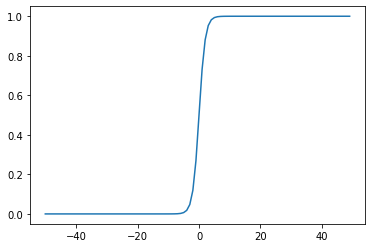

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# create the sigmoid function
def sigmoid_function(f):
    '''Calculates p for given f'''
    p = 1/(1+np.exp(-f))
    return p

# create the logit function
def logit_function(x, b, w):
    '''Caluculates the border'''
    f = b + w*x
    return f

b = 0
w = 1
x = np.arange(-50, 50, 1)
f = logit_function(x, b, w)
p = sigmoid_function(f)

plt.plot(x,p) 
plt.show()



result:
- $p(f(x))$ (the result of the sigmoid function) or in short $p(x)$ is mainly only 0 or 1 (about)
- b shifts the sigmoid function to the left and right
- Larger w's sharpen the sigmoid function.
- Real fractions smoothen the sigmoid function.
- Negative w's flip the sigmoid function.

## Conclusion:
We can customize the simgoid function to our needs so that it can be used to discrimitate/binarize/classify any numerical feature x. 

#### Open questions:
a) What about the p's which are not 0 or 1?  
b) How can we know the best suited b and w?

#### Answers:
a) $p(x)$ can be interpreted as the probability that a certain x belongs to the group of 1's (and vice versa).  
&nbsp;&nbsp;&nbsp;&nbsp;=> use a threshold, usually 0.5 for discrimination  
b) This is what logistic regression does for us. The process is called fitting or training.  
&nbsp;&nbsp;&nbsp;&nbsp;For the training, the algorithm (e.g. gradient descent) minimizes a so-called loss function (also named error/cost/objective function).  
&nbsp;&nbsp;&nbsp;&nbsp;This minimum ensures that the best parameters (b, w) were found.


#### For the particularly interested:
For logistic regression the log loss function LLF (also referred to as binary cross entropy) is used:  
$LLF = -\frac{1}{n}\sum_{i=0}^n\Bigg[ \Bigg(y_i \ln(p(x_i)\Bigg) + \Bigg((1-y_i) \ln(1-p(x_i)\Bigg)\Bigg]\quad$ with $y_i$ being the real observations (0 or 1)  


| $y_i$ (real value) | $p(x_i)$ (prediction) | val in [] |
| :- | :- | :- |
| 0 | 0 | 0 |
| 0 | $\neq 0$ | large
| 1 | 1 | 0
| 1 | $\neq 1$ | large

==> The further the prediction is from the real value, the greater the LLF  
_vice versa_: **The smaller the loss, the better the prediction.**  
REMEMBER the term "loss function" (= objective function, cost function). We will meet it regularly in the future.
You can find a [chapter](https://spiced.space/pca-pasilla/ds-course/chapters/project_titanic/log_loss/README.html) about log loss in the course material.



## Let's carry out an example on our ML workflow now

## 1. Define (business) goal

Train a model that is as accurate as possible to predict if a penguin belongs to the Gentoo or the Adelie `species` using only the feature `body mass`

## 2. Get Data 

- Read in data set from `seaborn` (Data set is part of the sns library.)
- Get rid of the third class (Chinstrap) as we want a binary classification

In [15]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [16]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [17]:
df = df[df['species'] != 'Chinstrap']

In [18]:
df.shape

(276, 7)

In [21]:
df['species'].value_counts()

Adelie    146
Gentoo    119
Name: species, dtype: int64

In [20]:
df = df.dropna()

## 3. Train-test split 

Separate X and y

Terminology:
- The variables (X) with which we want to predict something are called &emsp;features, inputs, predictors, or independent variables.  
- The variables (y) which we want to predict are called &emsp;outputs, responses, or dependent variables.

In [22]:
y = df['species']
y.shape

(265,)

In [23]:
y, type(y) # <- is a Series

(0      Adelie
 1      Adelie
 2      Adelie
 4      Adelie
 5      Adelie
         ...  
 338    Gentoo
 340    Gentoo
 341    Gentoo
 342    Gentoo
 343    Gentoo
 Name: species, Length: 265, dtype: object,
 pandas.core.series.Series)

In [24]:
X = df[['body_mass_g']] # <- select feature(s) with double [[]] brackets even it's only one feature!!!

In [25]:
X, type(X) # <- is a dataframe

(     body_mass_g
 0         3750.0
 1         3800.0
 2         3250.0
 4         3450.0
 5         3650.0
 ..           ...
 338       4925.0
 340       4850.0
 341       5750.0
 342       5200.0
 343       5400.0
 
 [265 rows x 1 columns],
 pandas.core.frame.DataFrame)

Train-test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# random_state = 42 is only for educational purposes, so that we all have the same splitting. Is usually omitted.

In [63]:
X_train.shape, X_test.shape

((212, 1), (53, 1))

|  | feature(s)<br>X | responses<br>y
| - | - | - 
| train<br>(e.g. 80%) | X_train | y_train 
| test<br>(e.g. 20%) | X_test | y_test 

## 4. Explore the data

If we separated X and y before test-train-split but want to explore the data **with** our labels, we can concatenate X and y of the test data again:

In [28]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [29]:
df_train.head()

,body_mass_g,species
247,5650.0,Gentoo
308,4875.0,Gentoo
23,3950.0,Adelie
96,3700.0,Adelie
257,5250.0,Gentoo


use seaborn's catplot

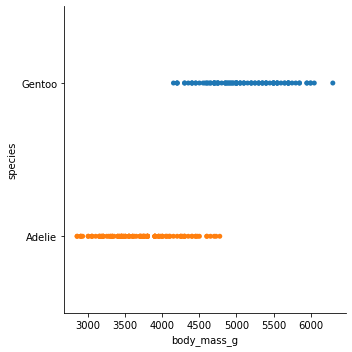

In [30]:
sns.catplot(data = df_train, x = 'body_mass_g', y = 'species', jitter = False)

## 5. Feature Engineering 

Skipped for now: topic for the whole day tomorrow. 
- Feature engineering is very important for logisitic regression LR, because:
    - LR doesn't take missing values
    - LR can't work with categorical variables e.g. 'sex'
    - LR likes to have the numerical data more or less in in the same scale range. 


'Luckily' our goal was defined using only one numerical variable.

## 6. Train Model

* Classify a penguin as 'Adelie' or 'Gentoo' 
* Use only Body Mass as X
* We would like to find the coefficients (b, w) of the logistic function that result in the most accurate model (smallest possible log loss)

### Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
m = LogisticRegression()

In [34]:
m.fit(X_train, y_train)

LogisticRegression()

Take a look at the coefficients

In [38]:
w = m.coef_

In [40]:
b = m.intercept_

In [45]:
f' w: {w[0][0]} and b: {b[0]}'

' w: 0.00636809526155041 and b: -28.186982294148613'

#### Bonus: check output Sigmoid Function

In [42]:
# Create the sigmoid function
def sigmoid_function(x, b, w):
    '''Calculates the y value for given x, b and w'''
    y = 1/(1+np.exp(-(b + w*x)))
    return y

def logit_function(x, b, w):
    '''Caluculates the border'''
    y = b + w*x
    return y

In [43]:
df['Sigmoid'] = sigmoid_function(X, b, w)
df['logit'] = logit_function(X, b, w)

In [44]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Sigmoid,logit
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.013300,-4.306625
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.018195,-3.988220
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.000558,-7.490673
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.001991,-6.217054
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.007080,-4.943435


In [47]:
df['Predicted Species'] = round(df['Sigmoid'],0).astype(int)

In [48]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Sigmoid,logit,Predicted Species
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.013300,-4.306625,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.018195,-3.988220,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.000558,-7.490673,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.001991,-6.217054,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.007080,-4.943435,0


(-0.1, 1.1)

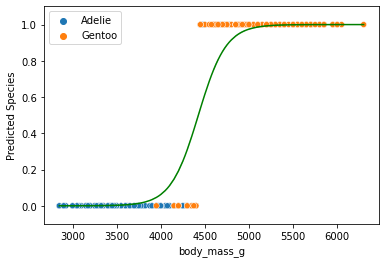

In [50]:
sns.scatterplot(x = df['body_mass_g'], y = df["Predicted Species"], hue = df["species"])

sns.lineplot(x = df['body_mass_g'], y = df["Sigmoid"], color = "green")

# sns.lineplot(x = df['body_mass_g'], y = df["logit"], color = "red")
plt.ylim((-0.1, 1.1))

### 7. Optimize
Not for now.

## 8. Evaluate model

In [51]:
# Let's use our model m to predict the test data which it has never seen

m.predict(X_test)

array(['Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie'], dtype=object)

In [52]:
# How large are the probabilities that the test penguins belong to one or the other species?
prob = m.predict_proba(X_test)

In [55]:
prob[:,0] + prob[:,1] # sum must be 1 because each penguin belongs to either Adelie or Gentoo.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [56]:
evaluate_testdata = pd.DataFrame()
evaluate_testdata['species'] = y_test
evaluate_testdata['prediction'] = m.predict(X_test)
evaluate_testdata['prob for Adelie'] = prob[:,0]
evaluate_testdata['prob for Gentoo'] = prob[:,1]

In [57]:
evaluate_testdata

,species,prediction,prob for Adelie,prob for Gentoo
254,Gentoo,Gentoo,0.009866,0.990134
121,Adelie,Adelie,0.997264,0.002736
102,Adelie,Adelie,0.999817,0.000183
29,Adelie,Adelie,0.954043,0.045957
14,Adelie,Adelie,0.541743,0.458257
145,Adelie,Adelie,0.992920,0.007080
332,Gentoo,Gentoo,0.193932,0.806068
51,Adelie,Adelie,0.690866,0.309134
260,Gentoo,Adelie,0.954043,0.045957
131,Adelie,Adelie,0.997264,0.002736


#### How good is our model in numbers?

In [59]:
# calculate the accuracy (how many percent where predicted correctly)

m.score(X_test, y_test)
f'{100*round(m.score(X_test, y_test),2)} % of the penguins were predicted correctly.'


'92.0 % of the penguins were predicted correctly.'

You will learn more about evaluation this afternoon.

#### What would be the score if we just guessed the species?
(A model that does not improve this accuracy is not worth the name: [further reading](https://medium.com/@mamonu/what-is-the-scikit-learn-dummy-classifier-95549d9cd44)

For this DummyClassifiers can be used. (=> yesterday afternoon)

```python
from sklearn.dummy import DummyClassifier
dm = DummyClassifier(strategy= 'most_frequent')
dm.fit(X_train, y_train)
round(dm.score(X_test, y_test),2)
```

## 9. Predict

We can now use our model m to predict whether a certain penguin is an Adelie or a Gentoo just by the body mass:

In [62]:
m.predict([[5000]]) # should actually be formatted like a pandas dataframe => warning, but can be ignored for now

/home/thomas/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

***


## Extension (important to know)
The concept of logistic regression can also be used for  
- multivariate problems, i.e. there is more than one feature (= independent variable):  
&emsp;not only $x$ as shown above but $x_1 x_2, x_3$, ...
- multinomial problems, i.e. there can be more than two (0 or 1) response possibilities  

bivariate, bimodal example:

![grafik.png](./bimodal.png)

***

### Summary

- We investigated the sigmoid function
- which can be adapted to create linear borders between (two) classes (=> logistic regression).
- We saw a loss function and know that ML algorithms work by minimizing a loss function.
- We followed our machine learning recipe to create a logress model for penguin disrimination
- and investigated the goodness of the model by using previously separated test data.
- The model can now be used to predict completely new penguins.
- We learned that logress can also be used for multivarate and multimodal problems.
- We met several pointers to future encounters (feature engineering, gradient descent, eval. classifiers, cross validation, optimization, ...)


